<a href="https://colab.research.google.com/github/SkandarEverest/praktikum_ml/blob/main/IF5140_Praktikum_3_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ramdinal Aviesena Zairinal

NIM: 23224092

Nama: Fadhil Rausyanfikr

NIM: 23525046

# FFNN

[Link Dataset](https://drive.google.com/file/d/1LqFT1hsfedlrakGThC7VNfQcRnOqSImZ/view?usp=sharing)



In [ ]:
import math, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    mean_absolute_error, mean_squared_error, r2_score
)

import tensorflow as tf
from tensorflow import keras
layers = keras.layers
callbacks = keras.callbacks
optimizers = keras.optimizers


In [ ]:
df = pd.read_csv("/content/winequality.csv")

# Exploratory Data Analysis (EDA)

**Descriptive Analysis**

Melakukan analisis pada dataset untuk mendapatkan gambaran singkat terkait dataset seperti jumlah kolom dan baris, tipe data, jumlah null values pada dataset, dan lain-lain.

`df.head()`

`df.info()`

`df.describe()`

`df.isnull()`

**Visualization**

**Berikan contoh minimal 3 (tiga) visualisasi hasil eksplorasi dataset beserta penjelasan singkat untuk setiap visualisasi.**


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6,red
1,6.1,0.17,0.28,4.5,0.033,46.0,150.0,0.99330,3.43,0.49,10.9,6,white
2,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5,red
3,7.3,0.13,0.32,14.4,0.051,34.0,109.0,0.99740,3.20,0.35,9.2,6,white
4,6.1,0.34,0.27,2.6,0.024,20.0,105.0,0.99060,3.40,0.67,12.2,7,white


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   object 
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


In [ ]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


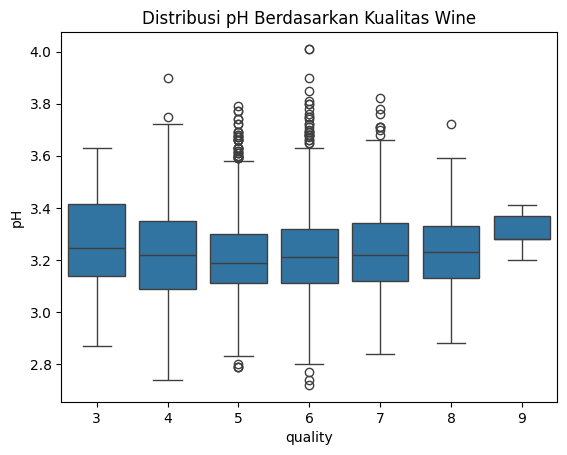

In [ ]:
eda_df = df.copy()

plt.title("Distribusi pH Berdasarkan Kualitas Wine")
sns.boxplot(x="quality", y="pH", data=eda_df)
plt.show()

Pada distribusi sebaran pH berdasarkan kualitas wine, terdapat beberapa outliers pada sebagian besar kelompok kualitas wine, kecuali pada nilai ekstrem kanan dan kiri.

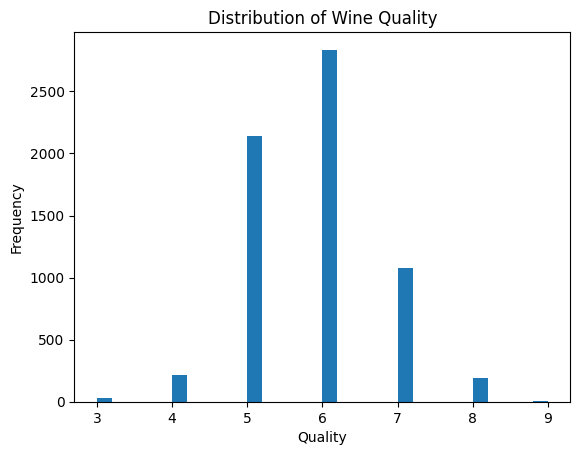

In [ ]:
plt.hist(df["quality"], bins=30)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

Pada target variabel, yaitu kualitas wine, distribusi datanya terlihat cukup normal, menyerupai bentuk bel. Mayoritas berkualitas 5 dan 6.

In [ ]:
eda_df = df.copy()

result = pd.crosstab(df['quality'], df['color'])

print(result)

color    red  white
quality            
3         10     20
4         53    163
5        681   1457
6        638   2198
7        199    880
8         18    175
9          0      5


Secara umum, proporsi anggur merah lebih kecil daripada anggur putih. Rasio anggur merah berbanding putih lebih kecil pada kualitas anggur yang sangat rendah atau tinggi, sedangkan pada kualitas anggur 5 dan 6 relatif tidak terlalu imbalans.

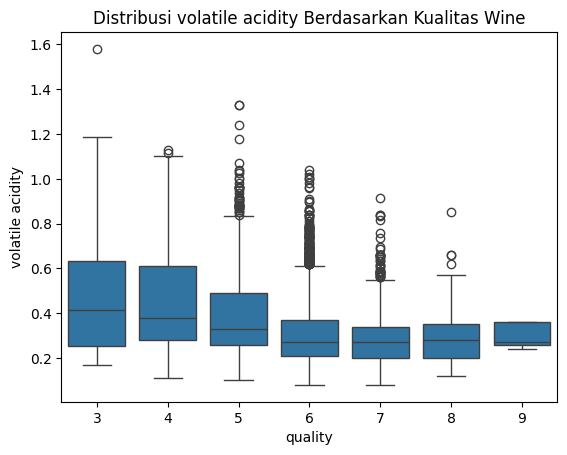

In [ ]:
eda_df = df.copy()

plt.title("Distribusi volatile acidity Berdasarkan Kualitas Wine")
sns.boxplot(x="quality", y="volatile acidity", data=eda_df)
plt.show()

Distribusi acidity berdasarkan kualitas wine menunjukkan beberapa outliers pada sebagian besar kelompoknya. Outliers banyak dijumpai pada kualitas wine 5, 6, dan 7.

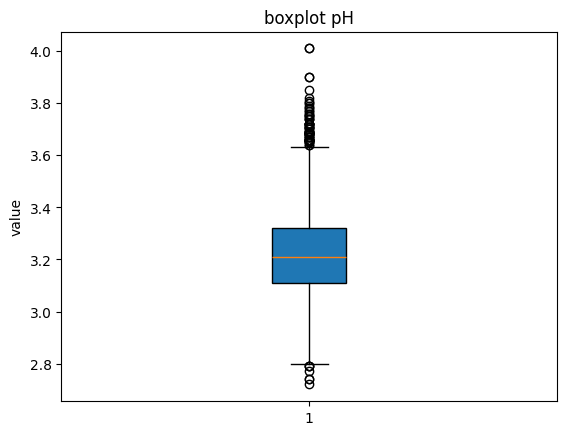

Outlier pada kolom pH: [2.74 2.79 3.76 3.71 3.75 3.68 3.77 3.69 4.01 3.72 3.78 3.65 3.75 3.69
 3.74 3.72 3.68 3.67 3.81 3.78 3.66 3.72 3.66 3.68 3.75 3.71 3.69 3.9
 3.7  3.82 4.01 3.66 3.66 3.72 3.8  3.66 3.9  2.74 3.69 3.69 3.71 3.68
 3.65 3.66 3.66 3.72 3.74 3.65 3.71 3.66 3.85 3.8  2.79 3.65 3.68 3.67
 2.72 3.66 3.77 3.67 3.72 3.76 3.69 3.67 3.79 3.64 3.64 2.77 2.79 3.74
 3.68 3.7  3.68]


In [ ]:
def outlier(data):
  Q1 = np.quantile(data, 0.25)
  Q3 = np.quantile(data, 0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]

  plt.boxplot(data, patch_artist=True)
  plt.title("boxplot pH")
  plt.ylabel("value")
  plt.show()
  return outliers
outlier = outlier(df["pH"])
print("Outlier pada kolom pH:", outlier.values)

# Data Preprocessing

Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model seperti split data train, validation dan test.

In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']].copy()
y = df['quality'].copy()

# Ensure 'alcohol' numeric; drop bad rows
X['alcohol'] = pd.to_numeric(X['alcohol'], errors='coerce')
valid_idx = X['alcohol'].notna()
X = X.loc[valid_idx].copy()
y = y.loc[valid_idx].copy()

# Drop classes that cannot be stratified (count < 2)
vc = y.value_counts()
keep_classes = vc[vc >= 2].index
mask_keep = y.isin(keep_classes)
X = X.loc[mask_keep].copy()
y = y.loc[mask_keep].copy()

X = X.astype('float32')
y = (y - y.min()).astype('int64')

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_val:   {X_val.shape}")
print(f"Ukuran y_val:   {y_val.shape}")
print(f"Ukuran X_test:  {X_test.shape}")
print(f"Ukuran y_test:  {y_test.shape}")

Ukuran X_train: (5165, 11)
Ukuran y_train: (5165,)
Ukuran X_val:   (646, 11)
Ukuran y_val:   (646,)
Ukuran X_test:  (646, 11)
Ukuran y_test:  (646,)


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train).astype('float32')
X_val_s   = scaler.transform(X_val).astype('float32')
X_test_s  = scaler.transform(X_test).astype('float32')

y_train = y_train.to_numpy(dtype=np.int64)
y_val   = y_val.to_numpy(dtype=np.int64)
y_test  = y_test.to_numpy(dtype=np.int64)

# Modeling + Evaluation

Tahap ini merupakan tahap pembuatan model menggunakan data train untuk melatih model dan data test untuk melakukan evaluasi terhadap kinerja model.

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
INPUT_DIM  = X_train_s.shape[1]
N_CLASSES  = int(len(np.unique(y_train)))
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

def build_ffnn_classifier(units=(128, 64), dropout=0.1, lr=1e-3):
    model = keras.Sequential()
    model.add(layers.Input(shape=(INPUT_DIM,)))
    for u in units:
        model.add(layers.Dense(u, activation='relu'))
        if dropout and dropout > 0.0:
            model.add(layers.Dropout(dropout))
    model.add(layers.Dense(N_CLASSES, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def build_ffnn_regressor(units=(128, 64), dropout=0.1, lr=1e-3):
    model = keras.Sequential()
    model.add(layers.Input(shape=(INPUT_DIM,)))
    for u in units:
        model.add(layers.Dense(u, activation='relu'))
        if dropout and dropout > 0.0:
            model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='mse',
                  metrics=['mae'])
    return model

In [ ]:
def fit(name, model, X_tr, y_tr, X_val, y_val, epochs=60, batch=64, patience=10):
    es = callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    hist = model.fit(
        X_tr.astype('float32'),
        y_tr,
        validation_data=(X_val.astype('float32'), y_val),
        epochs=epochs, batch_size=batch, verbose=0, callbacks=[es]
    )

    plt.figure()
    plt.plot(hist.history.get('loss', []), label='train_loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.title(f'{name} — Loss vs Epoch'); plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend()
    plt.tight_layout(); plt.show()

    # Classification: accuracy curves
    if 'accuracy' in hist.history or 'val_accuracy' in hist.history:
        plt.figure()
        plt.plot(hist.history['accuracy'], label='train_acc')
        plt.plot(hist.history['val_accuracy'], label='val_acc')
        plt.title(f'{name} — Accuracy vs Epoch'); plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend()
        plt.tight_layout(); plt.show()

    # Regression: MAE curves
    if 'mae' in hist.history or 'val_mae' in hist.history:
        plt.figure()
        plt.plot(hist.history['mae'], label='train_mae')
        plt.plot(hist.history['val_mae'], label='val_mae')
        plt.title(f'{name} — MAE vs Epoch'); plt.xlabel('epoch'); plt.ylabel('MAE'); plt.legend()
        plt.tight_layout(); plt.show()

    return model

In [ ]:
def evaluate_classification(name, model, X_te, y_te):
    probs = model.predict(X_te.astype('float32'), verbose=0)
    y_pred = np.argmax(probs, axis=1).astype('int64')

    print(f"\n=== {name} (Classification) ===")
    print(classification_report(y_te, y_pred, zero_division=0))
    print("accuracy:", accuracy_score(y_te, y_pred))

    labels = sorted(np.unique(np.concatenate([y_te, y_pred])))
    cm = confusion_matrix(y_te, y_pred, labels=labels)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix — {name}')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.tight_layout(); plt.show()

def evaluate_regression(name, model, X_te, y_te):
    y_pred = model.predict(X_te.astype('float32'), verbose=0).reshape(-1)
    mae  = mean_absolute_error(y_te, y_pred)
    rmse = math.sqrt(mean_squared_error(y_te, y_pred))
    r2   = r2_score(y_te, y_pred)

    print(f"\n=== {name} (Regression) ===")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2:  {r2:.4f}")

    plt.figure()
    plt.scatter(y_te, y_pred, s=10)
    lo, hi = float(np.min(y_te)), float(np.max(y_te))
    plt.plot([lo, hi], [lo, hi])
    plt.title(f'True vs Predicted — {name}')
    plt.xlabel('True'); plt.ylabel('Predicted')
    plt.tight_layout(); plt.show()


## Base Model

In [ ]:
BASE_UNITS   = (128, 64)
BASE_DROPOUT = 0.1
BASE_LR      = 1e-3
BASE_BATCH   = 64
BASE_EPOCHS  = 60
BASE_PATIENCE= 10

## Jumlah hidden layer

### Case A — 1 hidden layer (128) (Classification)

---



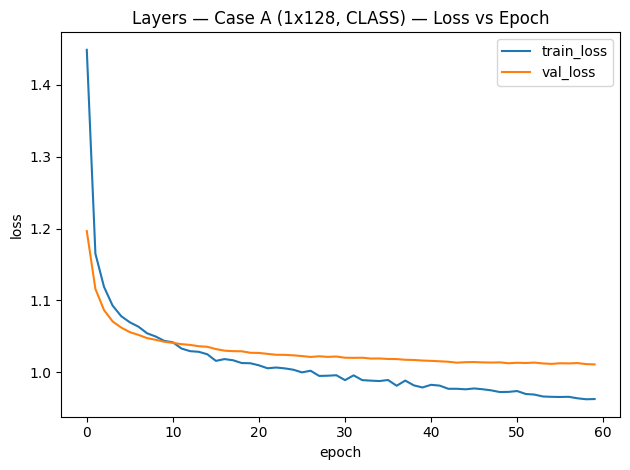

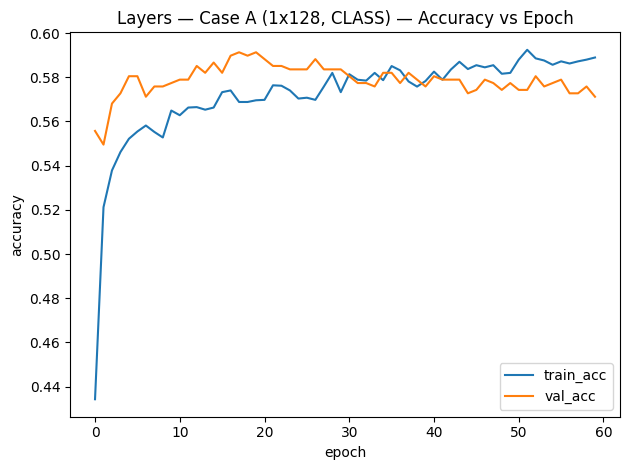


=== Layers — Case A (1x128, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.05      0.10        19
           2       0.64      0.62      0.63       224
           3       0.55      0.69      0.61       279
           4       0.48      0.32      0.39       102
           5       0.25      0.05      0.09        19
           6       0.00      0.00      0.00         1

    accuracy                           0.57       646
   macro avg       0.49      0.32      0.33       646
weighted avg       0.57      0.57      0.55       646

accuracy: 0.5696594427244582


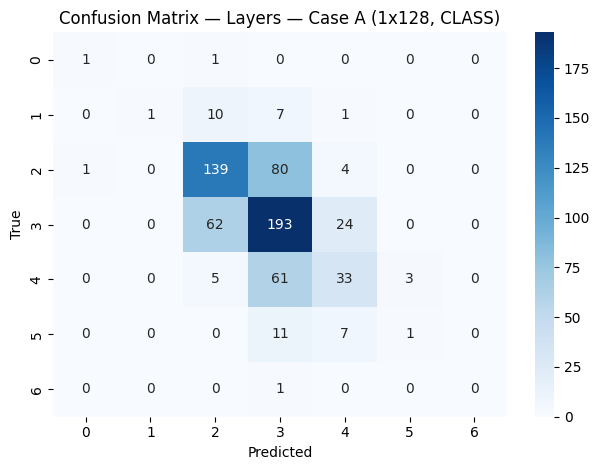

In [ ]:
mA_cls = build_ffnn_classifier(units=(128,), dropout=BASE_DROPOUT, lr=BASE_LR)
mA_cls = fit("Layers — Case A (1x128, CLASS)", mA_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Layers — Case A (1x128, CLASS)", mA_cls, X_test_s, y_test)

### Case A — 1 hidden layer (128) (Regression)

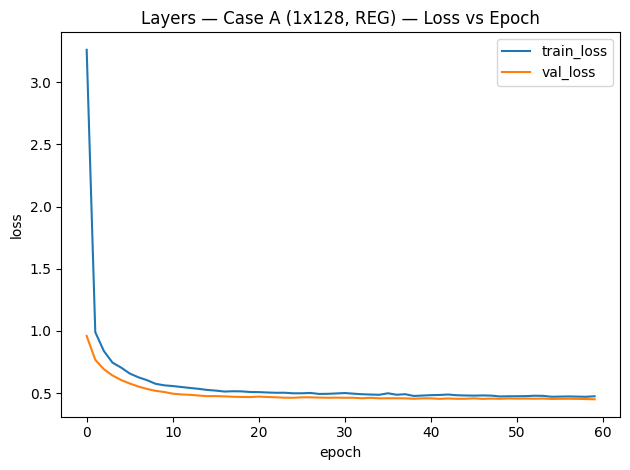

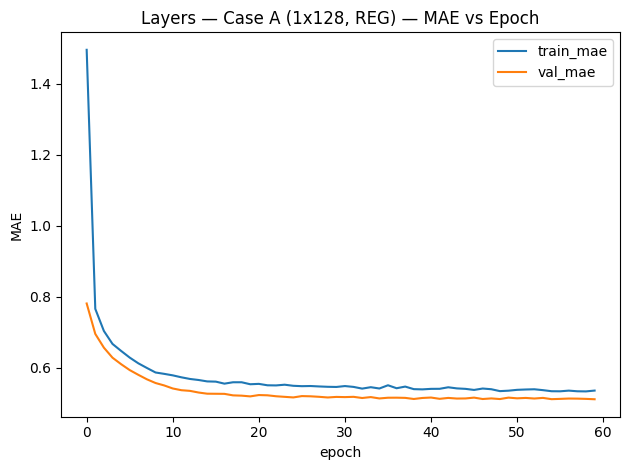


=== Layers — Case A (1x128, REG) (Regression) ===
MAE:  0.5234
RMSE: 0.6848
R^2:  0.3700


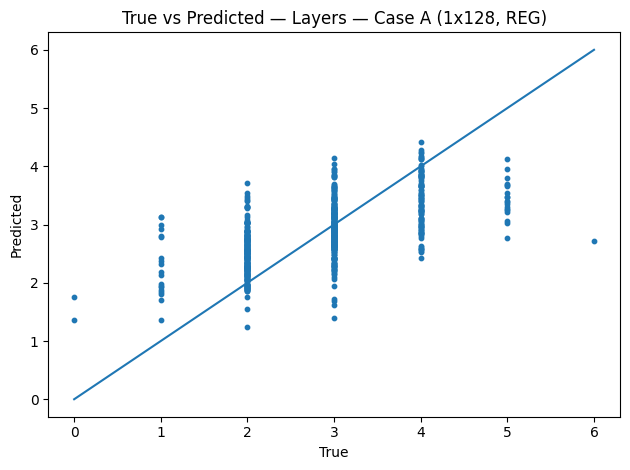

In [ ]:
mA_reg = build_ffnn_regressor(units=(128,), dropout=BASE_DROPOUT, lr=BASE_LR)
mA_reg = fit("Layers — Case A (1x128, REG)", mA_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Layers — Case A (1x128, REG)", mA_reg, X_test_s, y_test)

### Case B — deeper (256-128-64)(Classification)

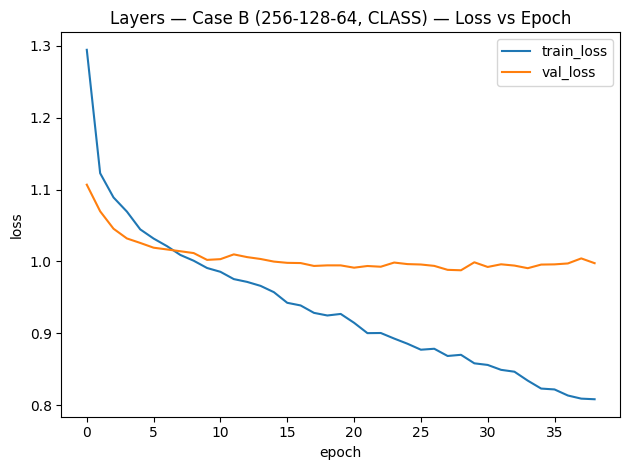

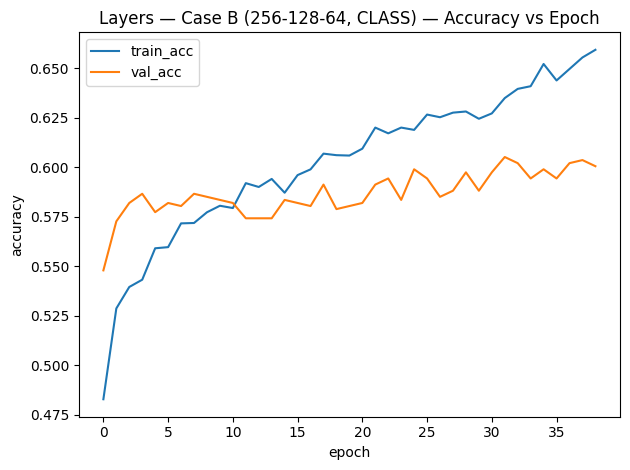


=== Layers — Case B (256-128-64, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00        19
           2       0.63      0.64      0.63       224
           3       0.58      0.68      0.62       279
           4       0.49      0.39      0.44       102
           5       0.29      0.11      0.15        19
           6       0.00      0.00      0.00         1

    accuracy                           0.58       646
   macro avg       0.36      0.33      0.34       646
weighted avg       0.56      0.58      0.56       646

accuracy: 0.5804953560371517


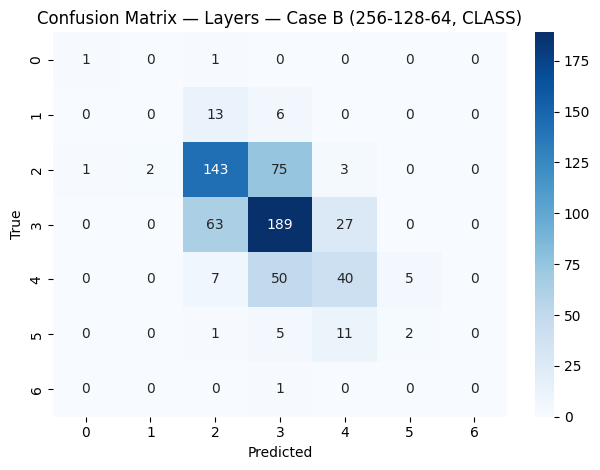

In [ ]:
mB_cls = build_ffnn_classifier(units=(256,128,64), dropout=BASE_DROPOUT, lr=BASE_LR)
mB_cls = fit("Layers — Case B (256-128-64, CLASS)", mB_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Layers — Case B (256-128-64, CLASS)", mB_cls, X_test_s, y_test)

### Case B — deeper (256-128-64)(Regression)

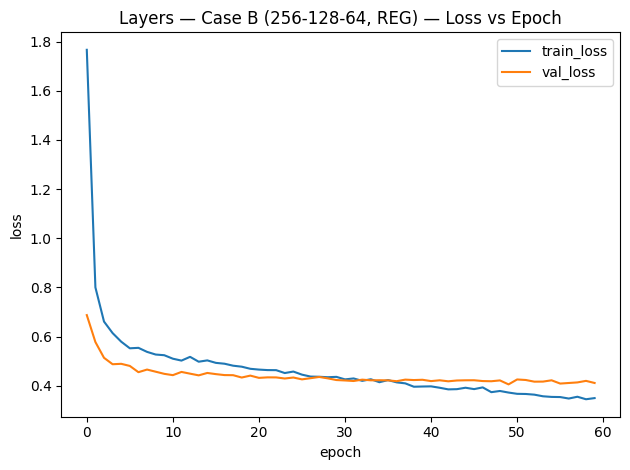

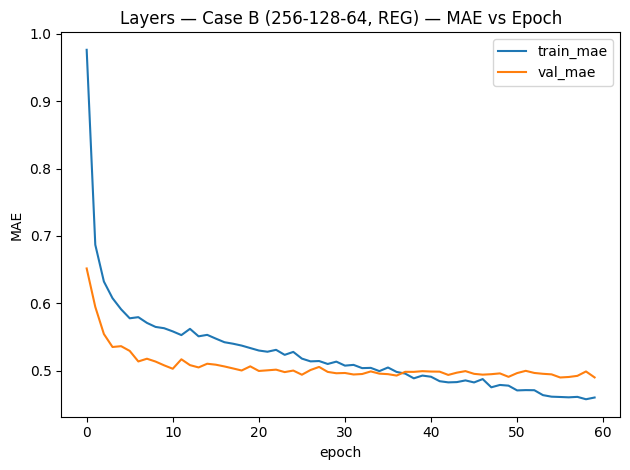


=== Layers — Case B (256-128-64, REG) (Regression) ===
MAE:  0.5041
RMSE: 0.6671
R^2:  0.4021


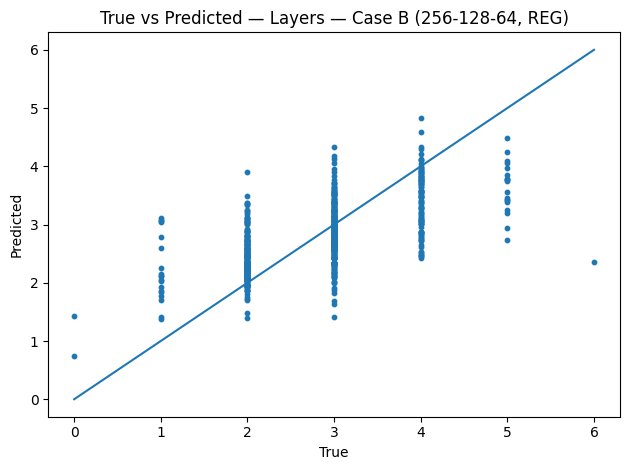

In [ ]:
mB_reg = build_ffnn_regressor(units=(256,128,64), dropout=BASE_DROPOUT, lr=BASE_LR)
mB_reg = fit("Layers — Case B (256-128-64, REG)", mB_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Layers — Case B (256-128-64, REG)", mB_reg, X_test_s, y_test)

### Analysis

Model dengan satu hidden layer (Case A) menghasilkan akurasi 0.56 dan R² 0.36, sedangkan model dengan tiga hidden layer (Case B) meningkat menjadi akurasi 0.60 dan R² 0.41. Artinya, penambahan jumlah hidden layer meningkatkan kemampuan model dalam menangkap pola hubungan antar-fitur dan memperbaiki performa baik pada klasifikasi maupun regresi. Pengaruh parameter ini adalah semakin banyak layer membuat jaringan memiliki kapasitas belajar yang lebih tinggi, namun juga berisiko overfitting bila data terbatas. Dengan demikian, penambahan layer direkomendasikan bila dataset cukup besar dan kompleks. Bila dataset kecil dan sederhana, cukup 1 sampai 2 hidden layer saja.

## Jumlah unit pada setiap hidden layer

### Case A — 64-32 (Classification)

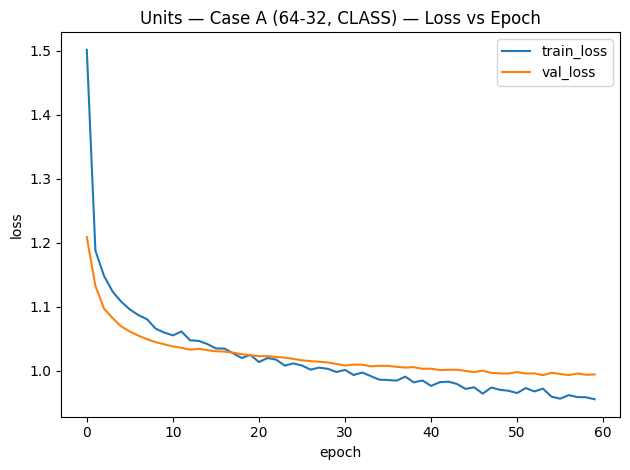

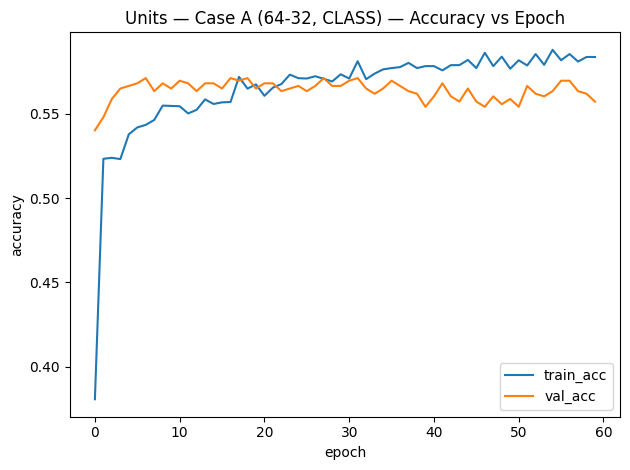


=== Units — Case A (64-32, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.11      0.17        19
           2       0.63      0.65      0.64       224
           3       0.56      0.66      0.61       279
           4       0.53      0.41      0.46       102
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1

    accuracy                           0.58       646
   macro avg       0.46      0.33      0.36       646
weighted avg       0.56      0.58      0.56       646

accuracy: 0.5804953560371517


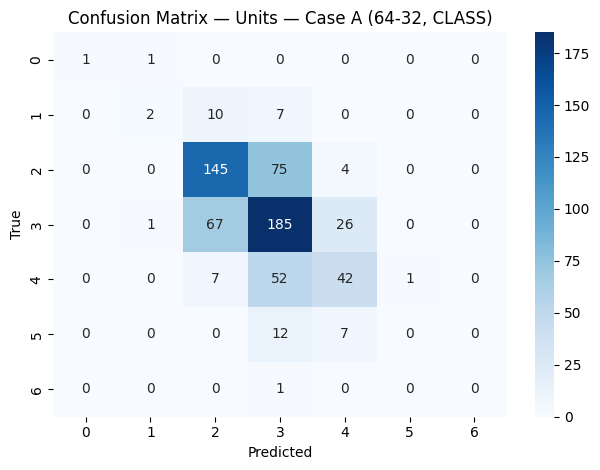

In [ ]:
mC_cls = build_ffnn_classifier(units=(64,32), dropout=BASE_DROPOUT, lr=BASE_LR)
mC_cls = fit("Units — Case A (64-32, CLASS)", mC_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Units — Case A (64-32, CLASS)", mC_cls, X_test_s, y_test)

### Case A — 64-32 (Regression)

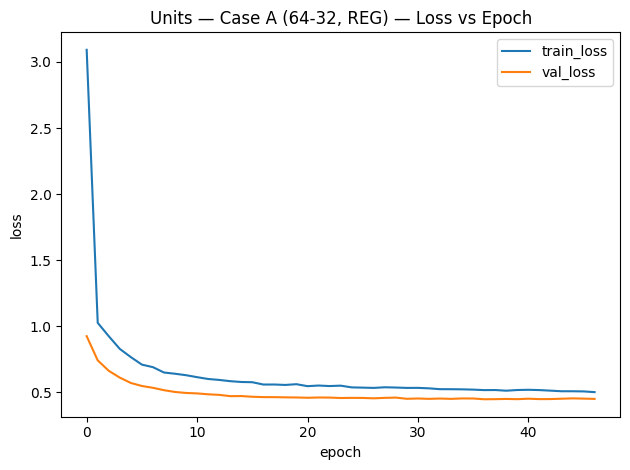

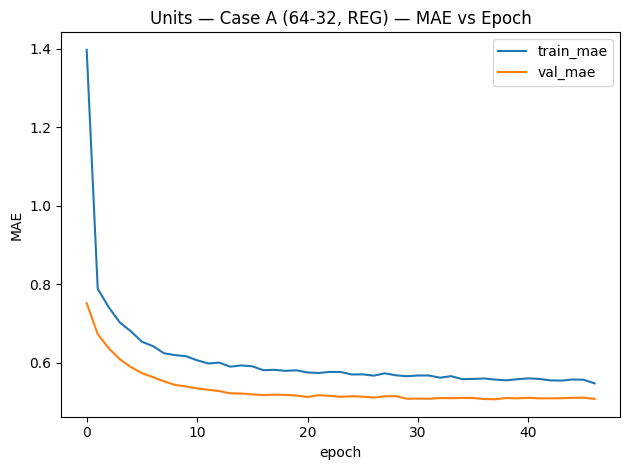


=== Units — Case A (64-32, REG) (Regression) ===
MAE:  0.5326
RMSE: 0.6922
R^2:  0.3563


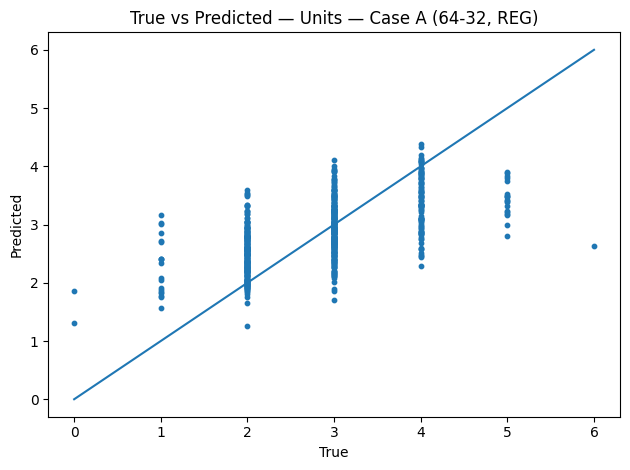

In [ ]:
mC_reg = build_ffnn_regressor(units=(64,32), dropout=BASE_DROPOUT, lr=BASE_LR)
mC_reg = fit("Units — Case A (64-32, REG)", mC_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Units — Case A (64-32, REG)", mC_reg, X_test_s, y_test)

### Case B — 256-128 (Classification)

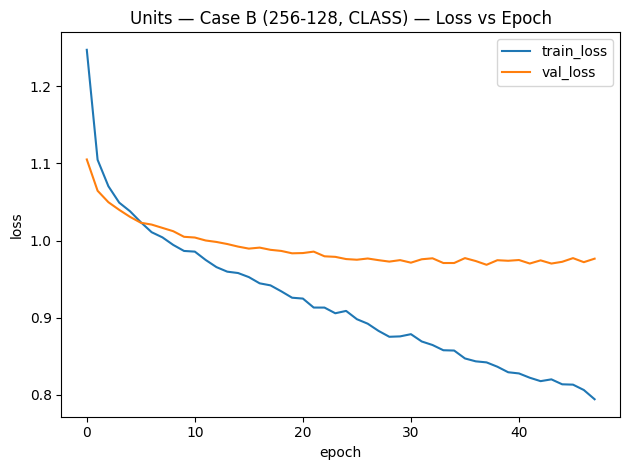

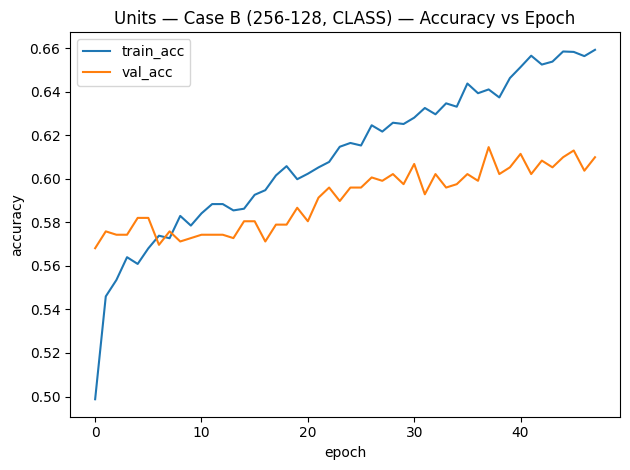


=== Units — Case B (256-128, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.05      0.10        19
           2       0.64      0.63      0.64       224
           3       0.56      0.70      0.62       279
           4       0.48      0.34      0.40       102
           5       0.40      0.11      0.17        19
           6       0.00      0.00      0.00         1

    accuracy                           0.58       646
   macro avg       0.37      0.26      0.27       646
weighted avg       0.57      0.58      0.56       646

accuracy: 0.5789473684210527


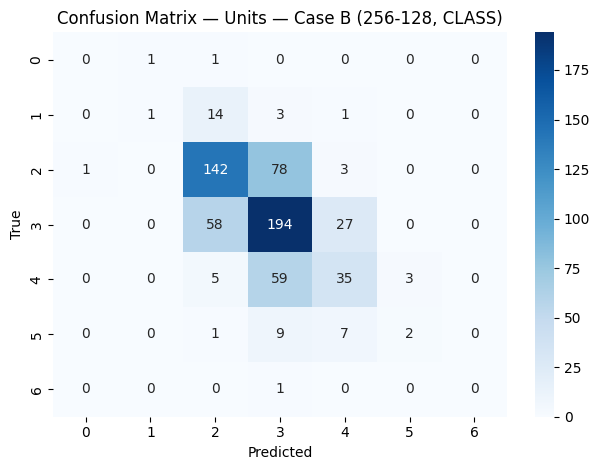

In [ ]:
mD_cls = build_ffnn_classifier(units=(256,128), dropout=BASE_DROPOUT, lr=BASE_LR)
mD_cls = fit("Units — Case B (256-128, CLASS)", mD_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Units — Case B (256-128, CLASS)", mD_cls, X_test_s, y_test)

### Case B — 256-128 (Regression)

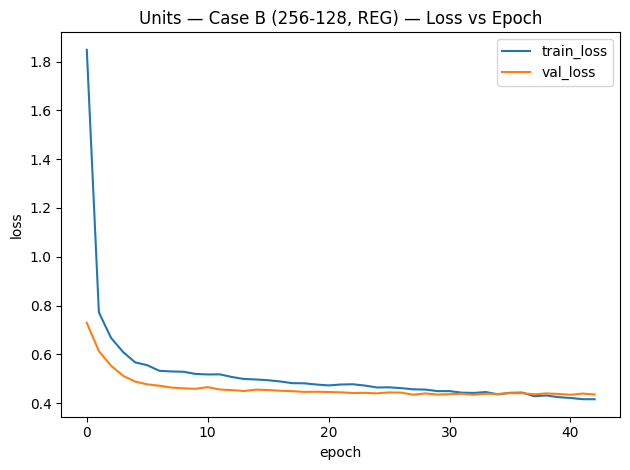

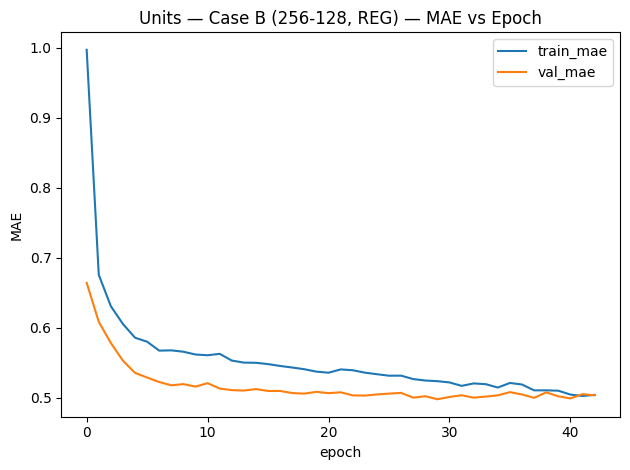


=== Units — Case B (256-128, REG) (Regression) ===
MAE:  0.5140
RMSE: 0.6781
R^2:  0.3822


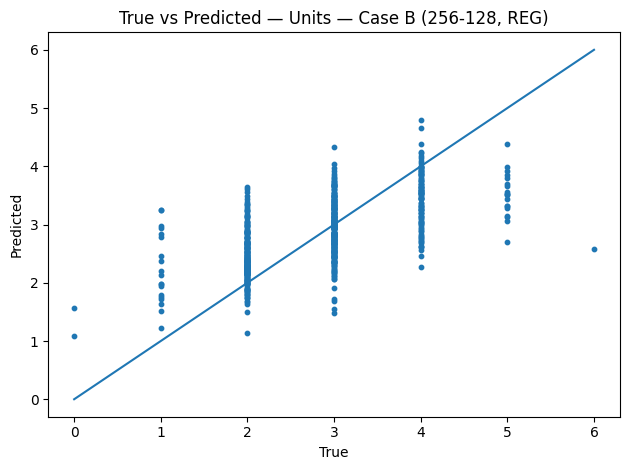

In [ ]:
mD_reg = build_ffnn_regressor(units=(256,128), dropout=BASE_DROPOUT, lr=BASE_LR)
mD_reg = fit("Units — Case B (256-128, REG)", mD_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Units — Case B (256-128, REG)", mD_reg, X_test_s, y_test)

### Analysis

Model dengan unit kecil (64–32) menghasilkan akurasi 0.57 dan R² 0.38, sedangkan model dengan unit besar (256–128) sedikit meningkat menjadi akurasi 0.59 dan R² 0.39. Artinya, jumlah unit pada setiap layer berpengaruh terhadap kapasitas model dalam mempelajari pola data; semakin banyak unit, semakin kompleks representasi yang bisa dipelajari. Namun, peningkatan ini tidak terlalu signifikan karena unit yang terlalu besar dapat menyebabkan overfitting dan membutuhkan data lebih banyak agar manfaatnya terasa.

## Epoch

### Case A — 20 epochs (Classification)

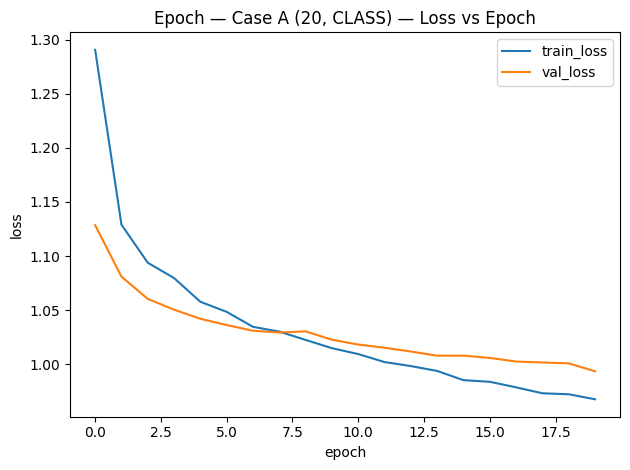

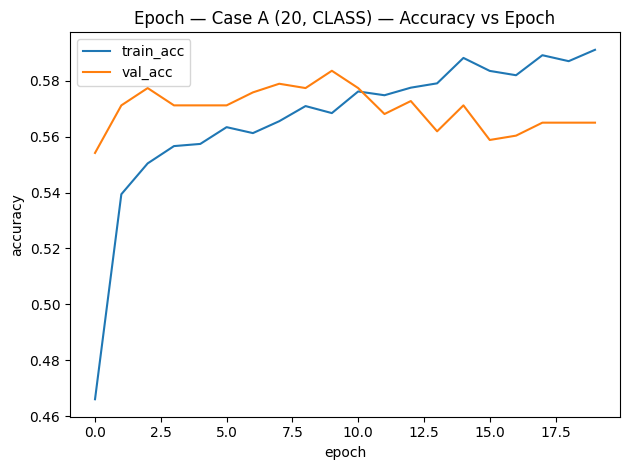


=== Epoch — Case A (20, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00        19
           2       0.62      0.62      0.62       224
           3       0.54      0.66      0.60       279
           4       0.51      0.40      0.45       102
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1

    accuracy                           0.57       646
   macro avg       0.38      0.31      0.33       646
weighted avg       0.53      0.57      0.55       646

accuracy: 0.56656346749226


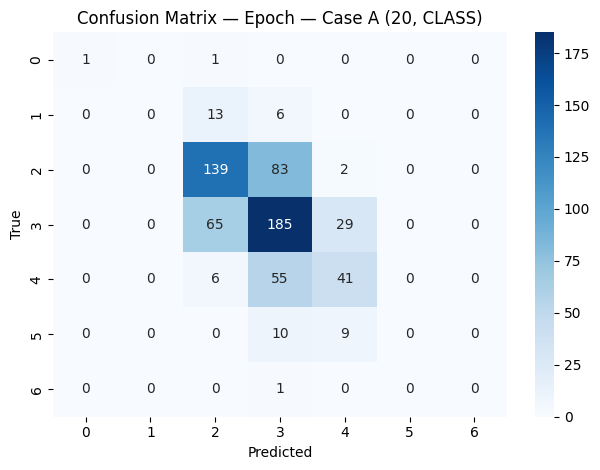

In [ ]:
mE_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mE_cls = fit("Epoch — Case A (20, CLASS)", mE_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=20, batch=BASE_BATCH, patience=6)
evaluate_classification("Epoch — Case A (20, CLASS)", mE_cls, X_test_s, y_test)

### Case A — 20 epochs (Regression)

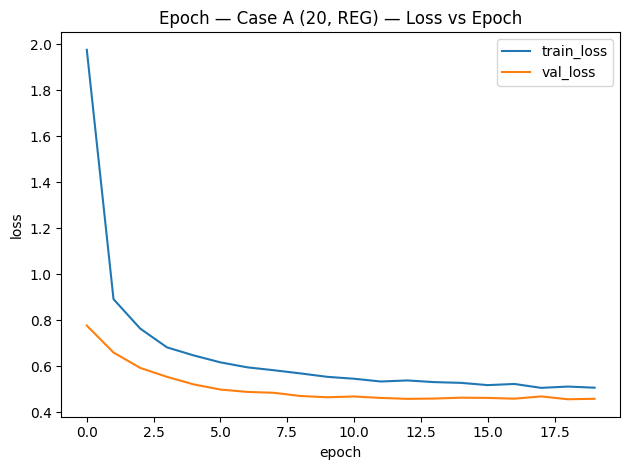

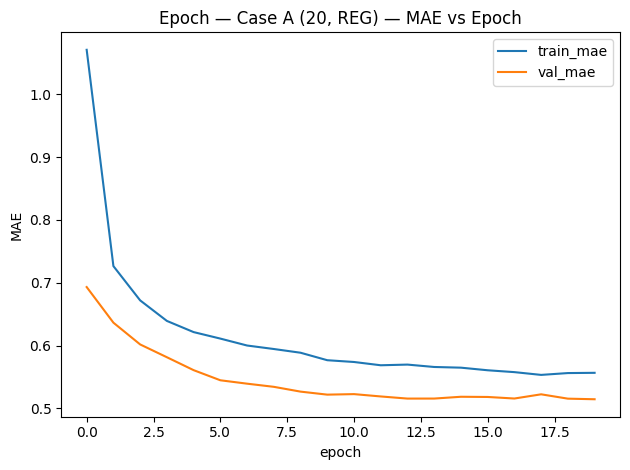


=== Epoch — Case A (20, REG) (Regression) ===
MAE:  0.5184
RMSE: 0.6876
R^2:  0.3647


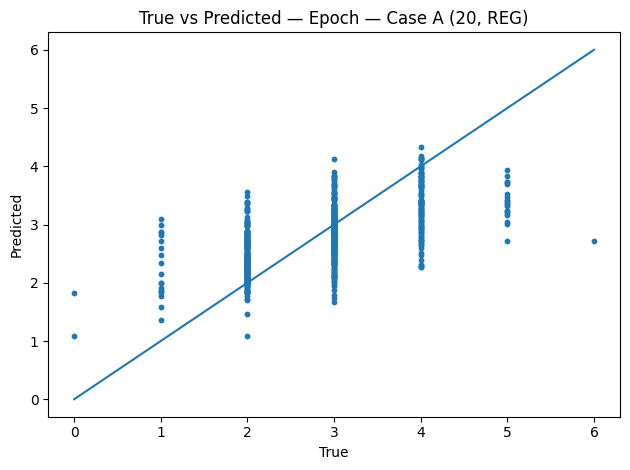

In [ ]:
mE_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mE_reg = fit("Epoch — Case A (20, REG)", mE_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=20, batch=BASE_BATCH, patience=6)
evaluate_regression("Epoch — Case A (20, REG)", mE_reg, X_test_s, y_test)

### Case B — 120 epochs (Classification)

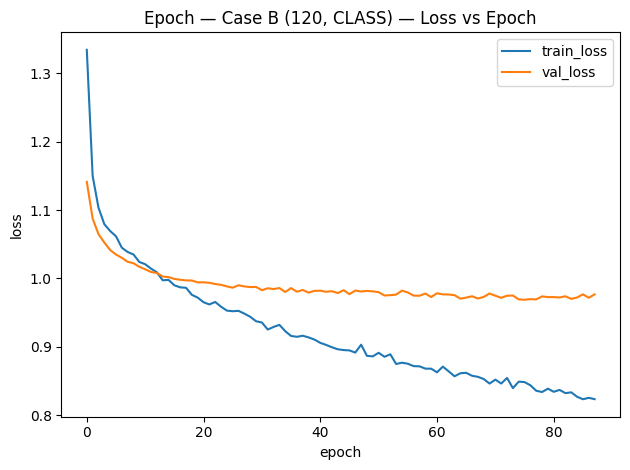

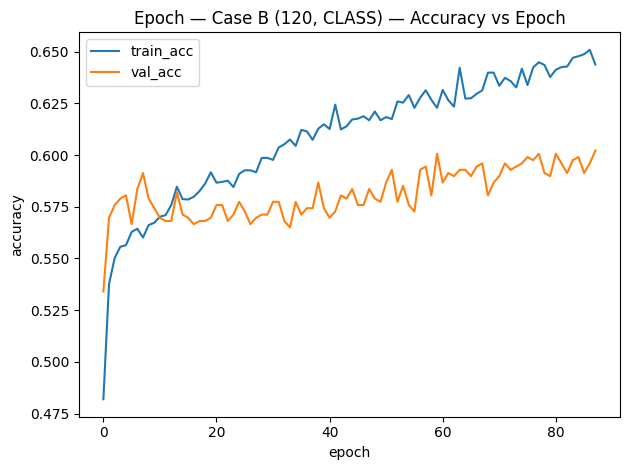


=== Epoch — Case B (120, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.05      0.10        19
           2       0.64      0.64      0.64       224
           3       0.57      0.69      0.62       279
           4       0.53      0.40      0.46       102
           5       0.50      0.11      0.17        19
           6       0.00      0.00      0.00         1

    accuracy                           0.59       646
   macro avg       0.53      0.34      0.36       646
weighted avg       0.60      0.59      0.57       646

accuracy: 0.5897832817337462


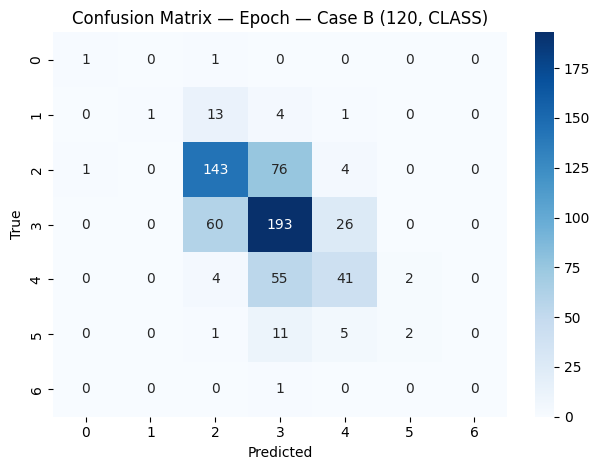

In [ ]:
mF_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mF_cls = fit("Epoch — Case B (120, CLASS)", mF_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=120, batch=BASE_BATCH, patience=12)
evaluate_classification("Epoch — Case B (120, CLASS)", mF_cls, X_test_s, y_test)

### Case B — 120 epochs (Regression)

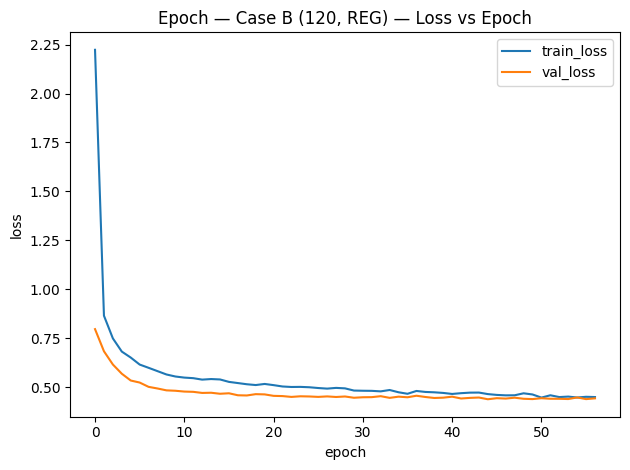

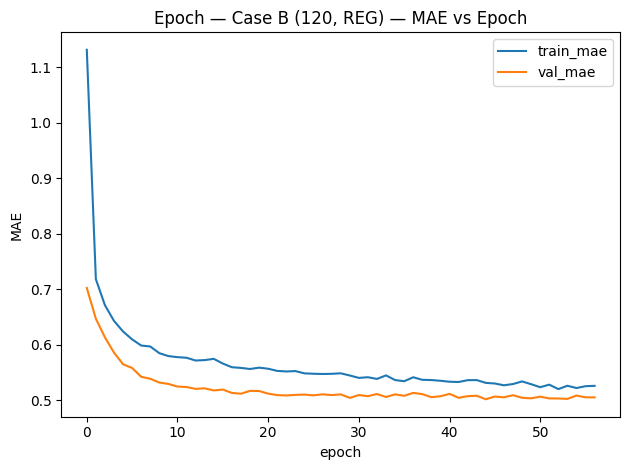


=== Epoch — Case B (120, REG) (Regression) ===
MAE:  0.5198
RMSE: 0.6811
R^2:  0.3767


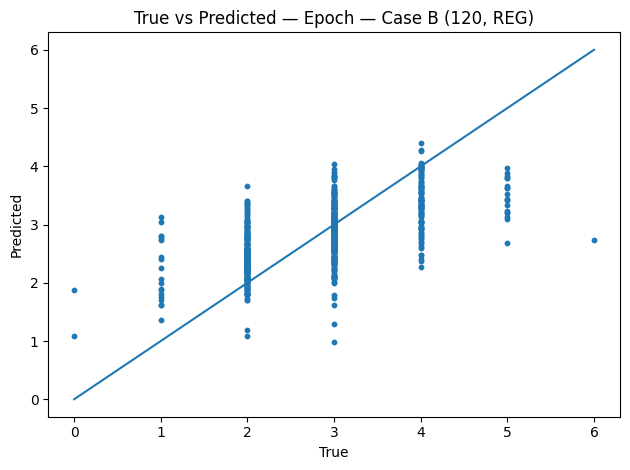

In [ ]:
mF_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mF_reg = fit("Epoch — Case B (120, REG)", mF_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=120, batch=BASE_BATCH, patience=12)
evaluate_regression("Epoch — Case B (120, REG)", mF_reg, X_test_s, y_test)

### Analysis

Model dengan epoch rendah (20) menghasilkan akurasi 0.57 dan R² 0.37, sedangkan epoch tinggi (120) hanya sedikit meningkat menjadi akurasi 0.58 dan R² 0.38. Hal ini menunjukkan bahwa menambah jumlah epoch memang memberi waktu belajar lebih lama, tetapi setelah titik tertentu peningkatan performa menjadi sangat kecil karena model sudah mencapai konvergensi. Pengaruh parameter epoch adalah mengontrol seberapa lama model belajar; terlalu sedikit menyebabkan underfitting, sedangkan terlalu banyak bisa membuat training tidak efisien atau overfitting tanpa peningkatan berarti.

## Ukuran batch

### Case A — batch 32 (Classification)

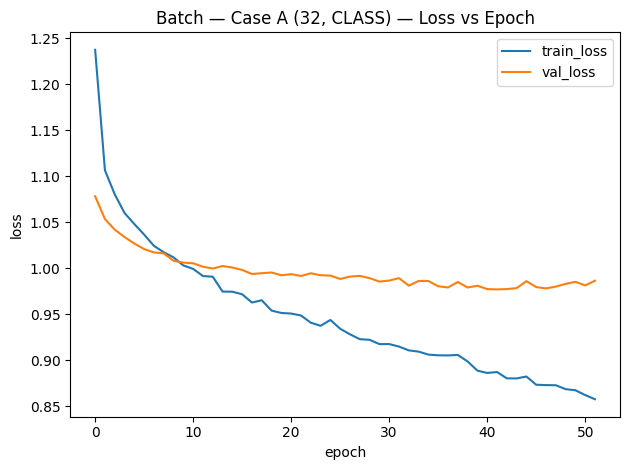

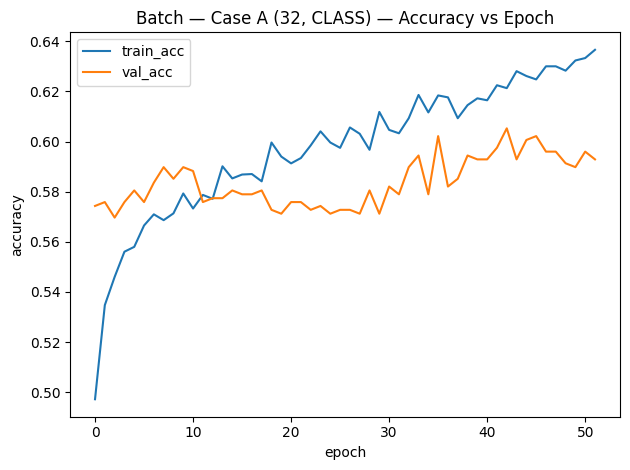


=== Batch — Case A (32, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      0.05      0.09        19
           2       0.63      0.66      0.64       224
           3       0.56      0.66      0.60       279
           4       0.51      0.36      0.42       102
           5       0.25      0.05      0.09        19
           6       0.00      0.00      0.00         1

    accuracy                           0.57       646
   macro avg       0.47      0.33      0.36       646
weighted avg       0.56      0.57      0.56       646

accuracy: 0.5743034055727554


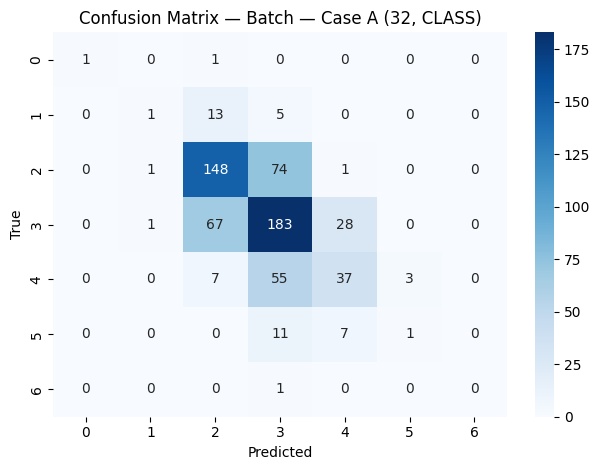

In [ ]:
mG_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mG_cls = fit("Batch — Case A (32, CLASS)", mG_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=32, patience=BASE_PATIENCE)
evaluate_classification("Batch — Case A (32, CLASS)", mG_cls, X_test_s, y_test)

### Case A — batch 32 (Regression)

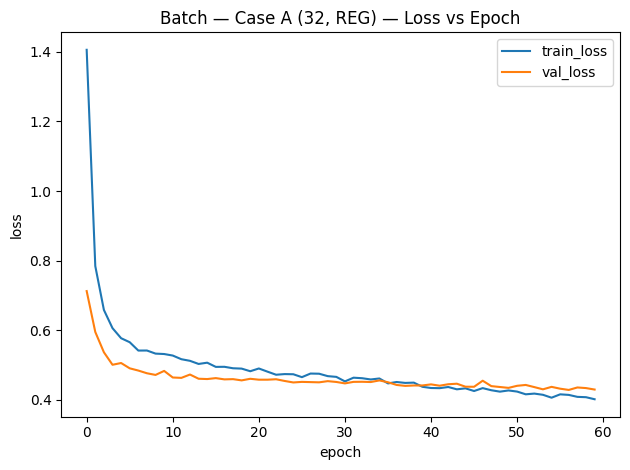

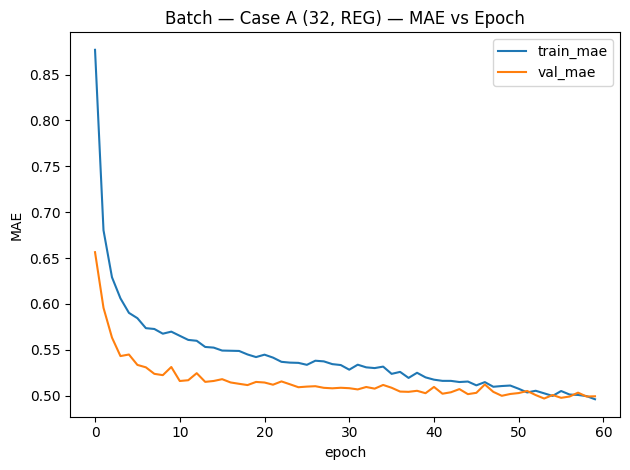


=== Batch — Case A (32, REG) (Regression) ===
MAE:  0.5134
RMSE: 0.6692
R^2:  0.3984


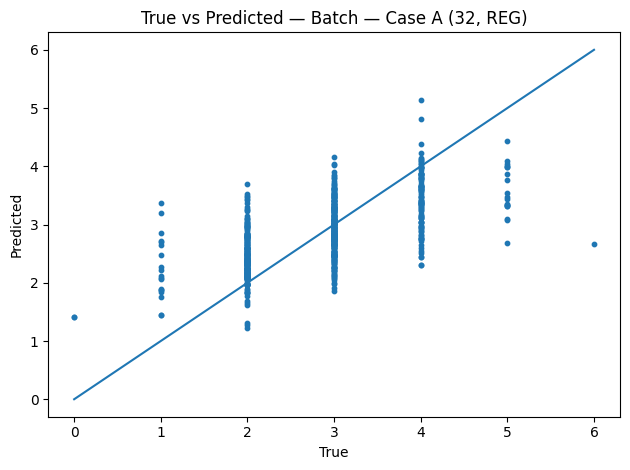

In [ ]:
mG_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mG_reg = fit("Batch — Case A (32, REG)", mG_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=32, patience=BASE_PATIENCE)
evaluate_regression("Batch — Case A (32, REG)", mG_reg, X_test_s, y_test)

### Case B — batch 256 (Classification)

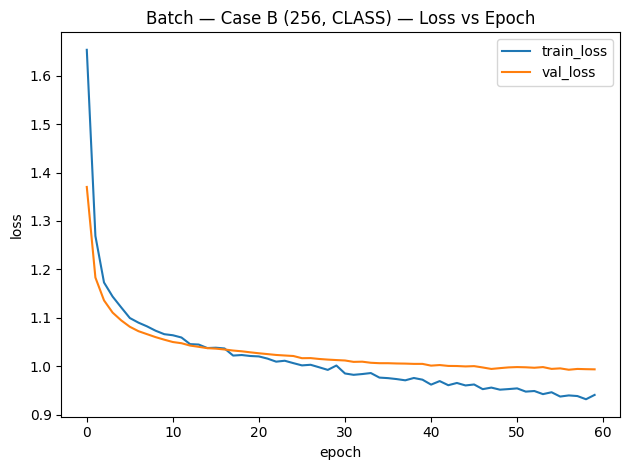

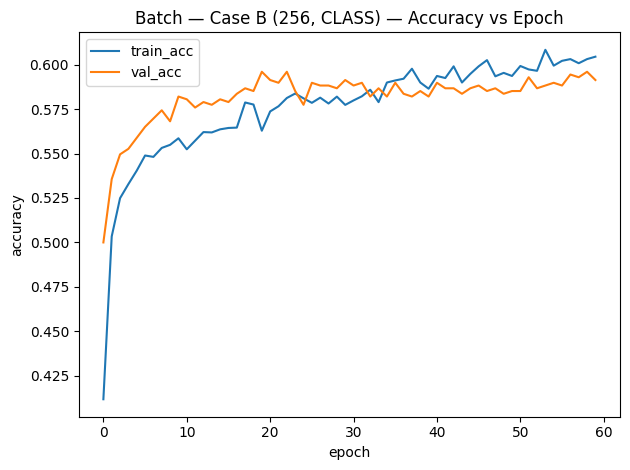


=== Batch — Case B (256, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.05      0.10        19
           2       0.64      0.63      0.64       224
           3       0.55      0.68      0.60       279
           4       0.47      0.34      0.40       102
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1

    accuracy                           0.57       646
   macro avg       0.45      0.31      0.32       646
weighted avg       0.56      0.57      0.55       646

accuracy: 0.5681114551083591


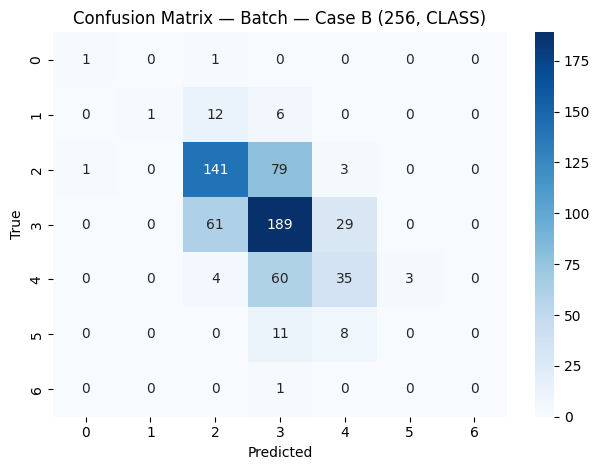

In [ ]:
mH_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mH_cls = fit("Batch — Case B (256, CLASS)", mH_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=256, patience=BASE_PATIENCE)
evaluate_classification("Batch — Case B (256, CLASS)", mH_cls, X_test_s, y_test)

### Case B — batch 256 (Regression)

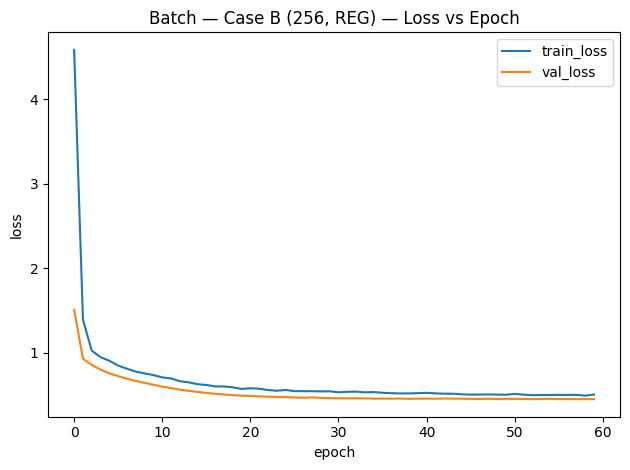

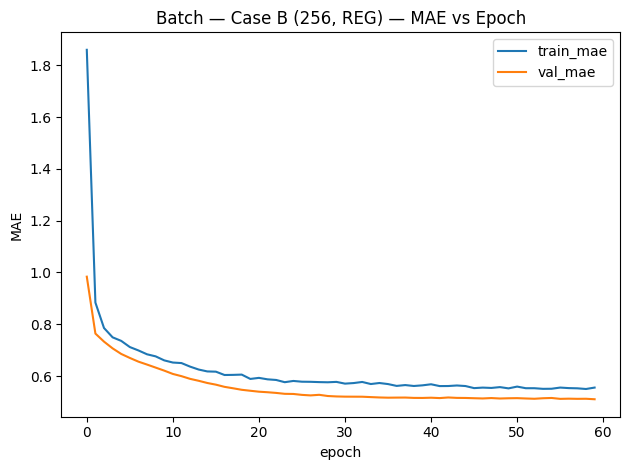


=== Batch — Case B (256, REG) (Regression) ===
MAE:  0.5254
RMSE: 0.6892
R^2:  0.3619


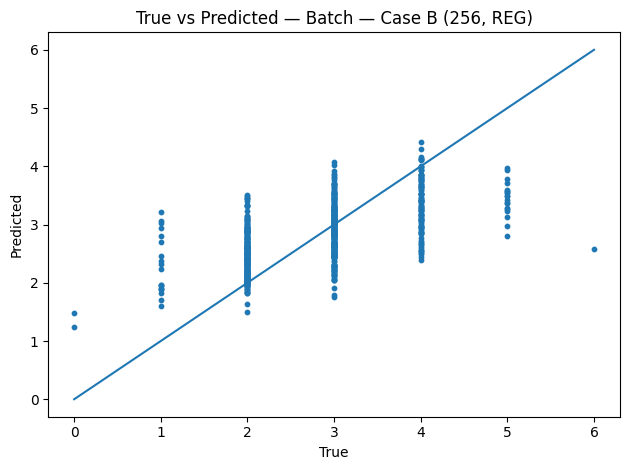

In [ ]:
mH_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=BASE_LR)
mH_reg = fit("Batch — Case B (256, REG)", mH_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=256, patience=BASE_PATIENCE)
evaluate_regression("Batch — Case B (256, REG)", mH_reg, X_test_s, y_test)

### Analysis

Model dengan batch kecil (32) menghasilkan akurasi 0.57 dan R² 0.40, sedangkan batch besar (256) sedikit menurun menjadi akurasi 0.56 dan R² 0.38. Ini menunjukkan bahwa ukuran batch memengaruhi stabilitas pembelajaran: batch kecil membuat pembaruan bobot lebih sering sehingga model belajar lebih detail, sedangkan batch besar membuat pembelajaran lebih cepat namun cenderung kurang sensitif terhadap variasi data. Dengan demikian, batch kecil umumnya memberikan hasil lebih baik untuk dataset berukuran sedang seperti ini karena mampu menangkap pola dengan lebih halus.

## Learning Rate

### Case A — LR 5e-4 (Classification)

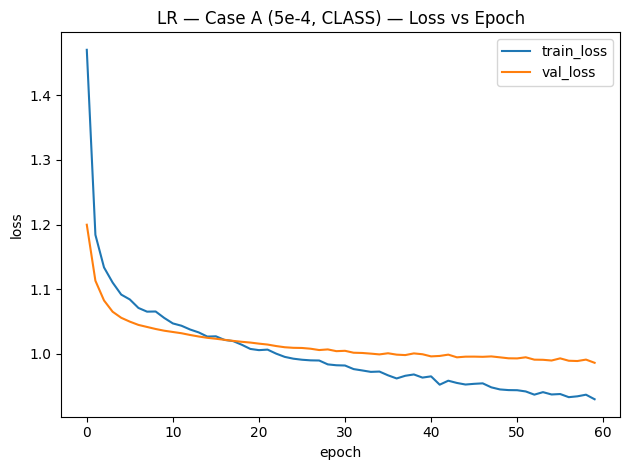

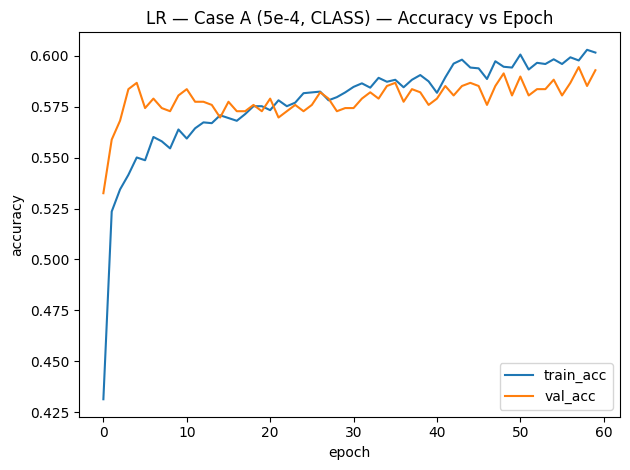


=== LR — Case A (5e-4, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.05      0.10        19
           2       0.62      0.64      0.63       224
           3       0.56      0.68      0.62       279
           4       0.56      0.39      0.46       102
           5       0.25      0.05      0.09        19
           6       0.00      0.00      0.00         1

    accuracy                           0.58       646
   macro avg       0.57      0.33      0.37       646
weighted avg       0.59      0.58      0.57       646

accuracy: 0.5835913312693498


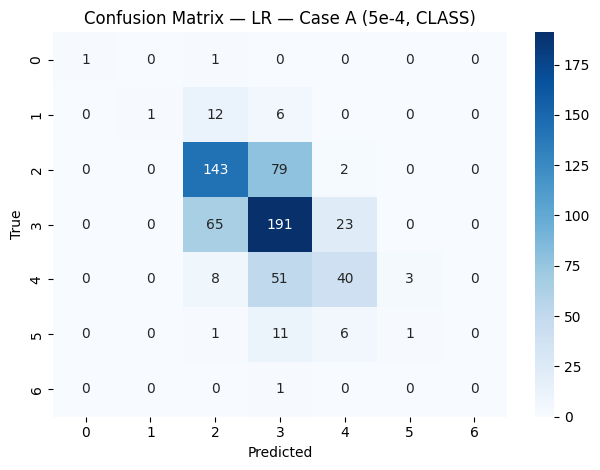

In [ ]:
mI_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=5e-4)
mI_cls = fit("LR — Case A (5e-4, CLASS)", mI_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("LR — Case A (5e-4, CLASS)", mI_cls, X_test_s, y_test)

### Case A — LR 5e-4 (Regression)

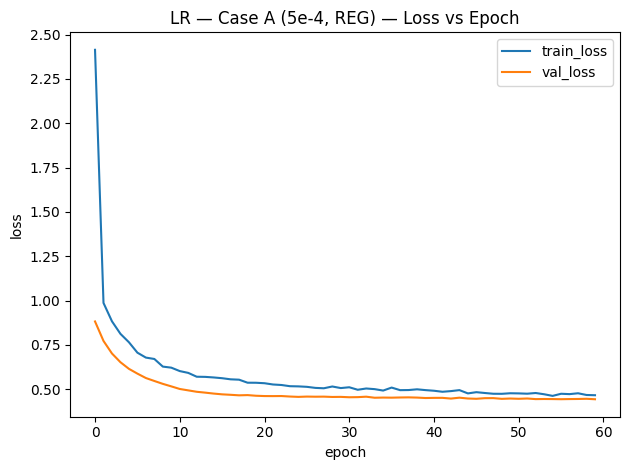

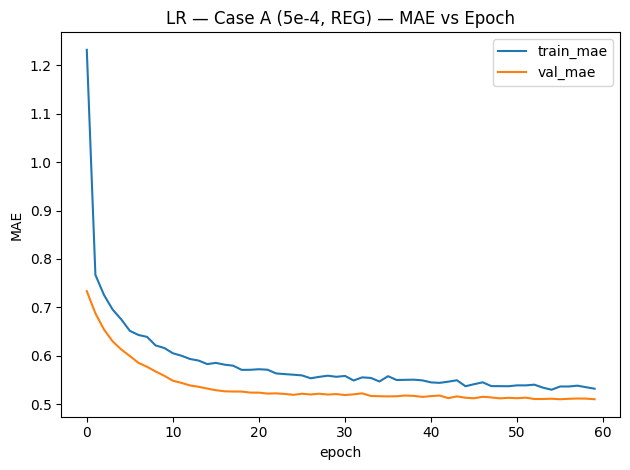


=== LR — Case A (5e-4, REG) (Regression) ===
MAE:  0.5119
RMSE: 0.6736
R^2:  0.3905


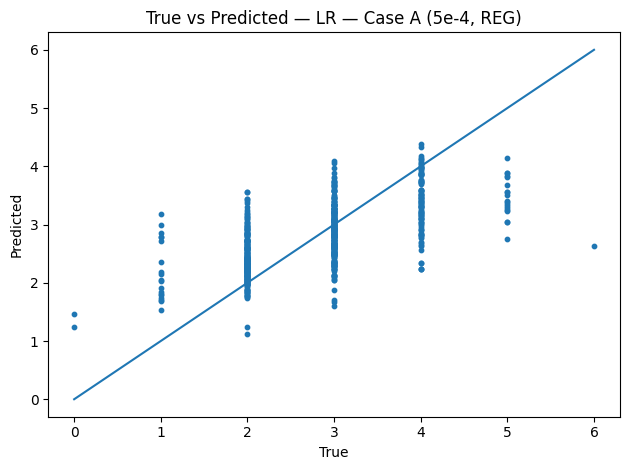

In [ ]:
mI_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=5e-4)
mI_reg = fit("LR — Case A (5e-4, REG)", mI_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("LR — Case A (5e-4, REG)", mI_reg, X_test_s, y_test)

### Case B — LR 2e-3 (Classification)

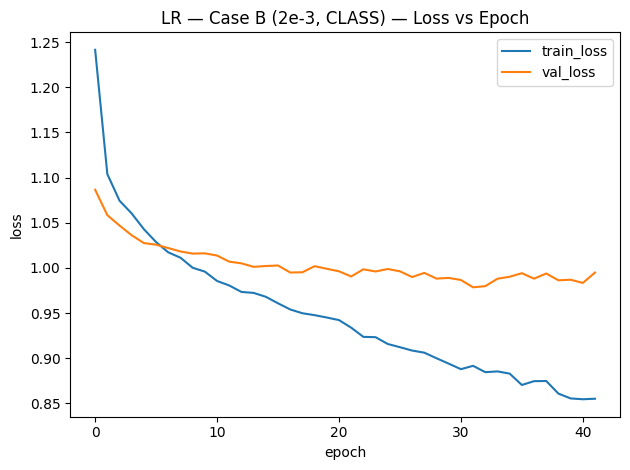

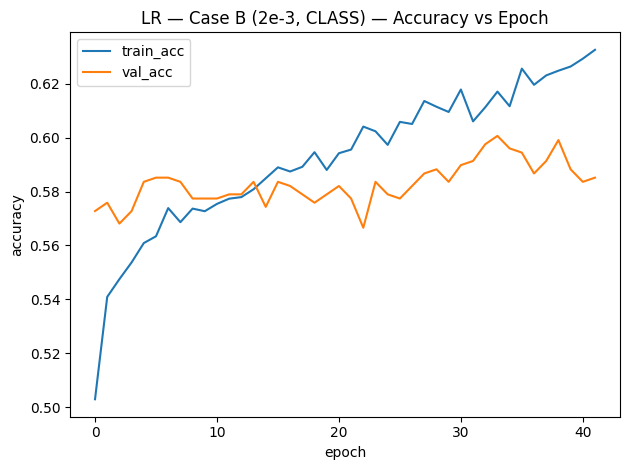


=== LR — Case B (2e-3, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.11      0.17        19
           2       0.63      0.63      0.63       224
           3       0.57      0.67      0.62       279
           4       0.53      0.45      0.49       102
           5       0.33      0.05      0.09        19
           6       0.00      0.00      0.00         1

    accuracy                           0.58       646
   macro avg       0.37      0.27      0.29       646
weighted avg       0.57      0.58      0.57       646

accuracy: 0.5835913312693498


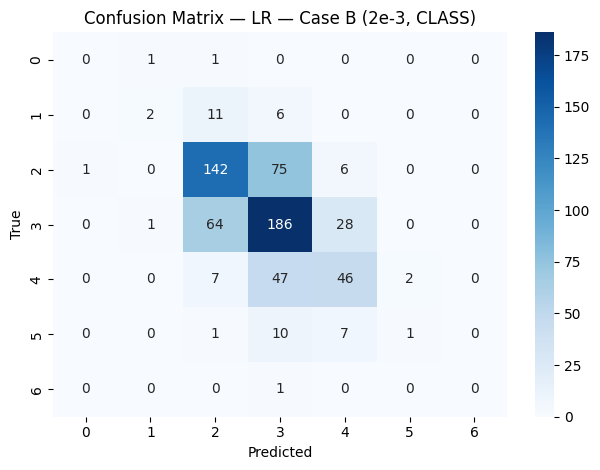

In [ ]:
mJ_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=2e-3)
mJ_cls = fit("LR — Case B (2e-3, CLASS)", mJ_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("LR — Case B (2e-3, CLASS)", mJ_cls, X_test_s, y_test)

### Case B — LR 2e-3 (Regression)

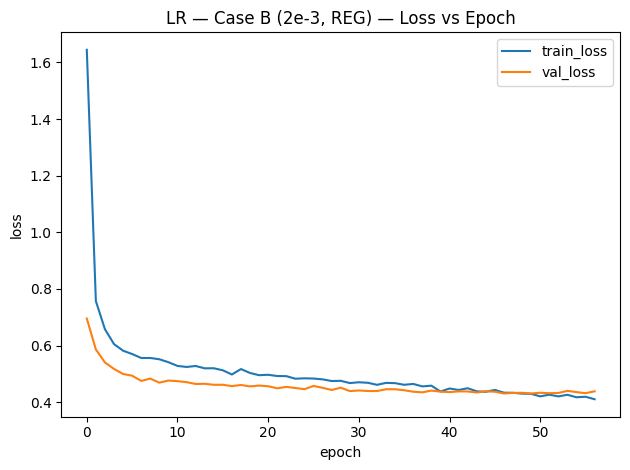

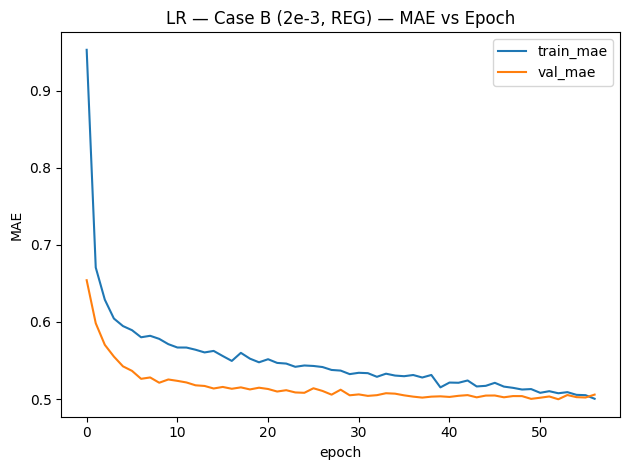


=== LR — Case B (2e-3, REG) (Regression) ===
MAE:  0.5130
RMSE: 0.6734
R^2:  0.3908


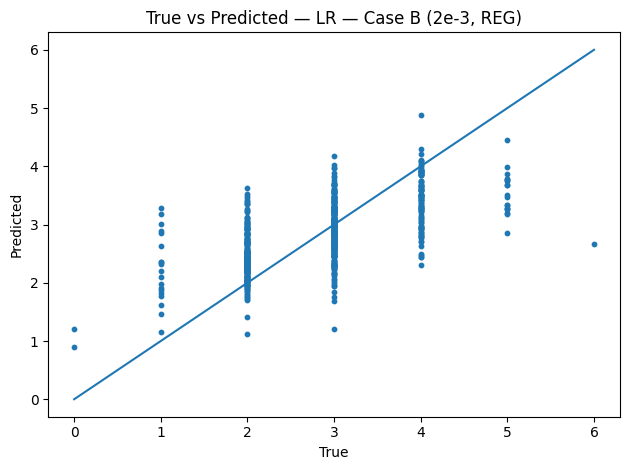

In [ ]:
mJ_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=BASE_DROPOUT, lr=2e-3)
mJ_reg = fit("LR — Case B (2e-3, REG)", mJ_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("LR — Case B (2e-3, REG)", mJ_reg, X_test_s, y_test)

### Analysis

Model dengan learning rate kecil (5e-4) menghasilkan akurasi 0.56 dan R² 0.38, sedangkan learning rate lebih besar (2e-3) sedikit meningkat menjadi akurasi 0.59 dan R² 0.40. Ini menunjukkan bahwa kecepatan pembelajaran berpengaruh langsung pada kemampuan model dalam menyesuaikan bobot selama training; learning rate yang terlalu kecil membuat model belajar lambat dan mudah terjebak di local minimum, sedangkan learning rate yang terlalu besar mempercepat konvergensi namun berisiko melewati titik optimal. Pada data ini, nilai sedang (2e-3) memberi keseimbangan terbaik antara stabilitas dan kecepatan belajar.

## Dropout layer

### Case A — dropout 0.0 (Classification)

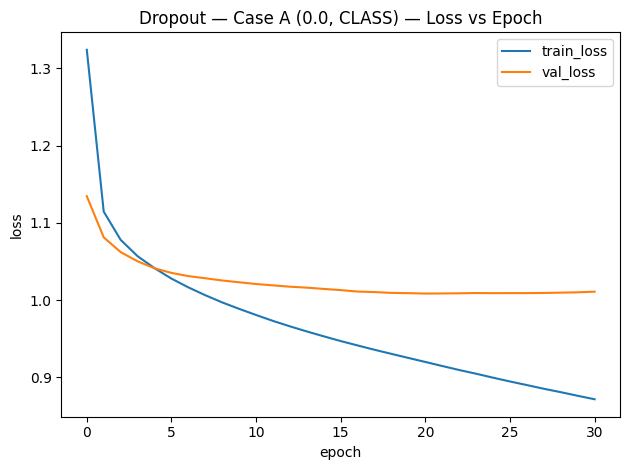

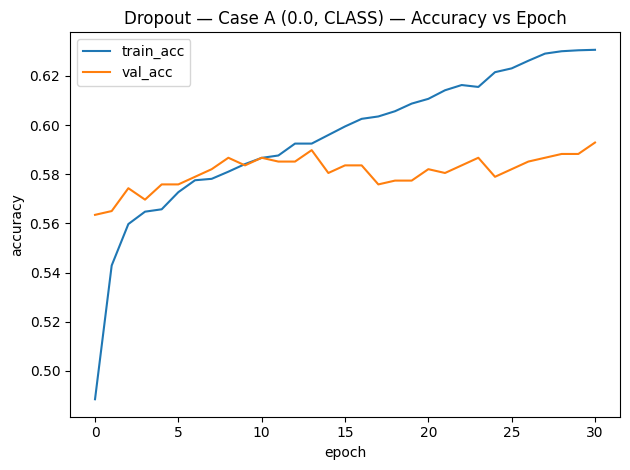


=== Dropout — Case A (0.0, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.11      0.19        19
           2       0.65      0.63      0.64       224
           3       0.56      0.71      0.63       279
           4       0.49      0.37      0.42       102
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1

    accuracy                           0.59       646
   macro avg       0.39      0.26      0.27       646
weighted avg       0.58      0.59      0.57       646

accuracy: 0.5851393188854489


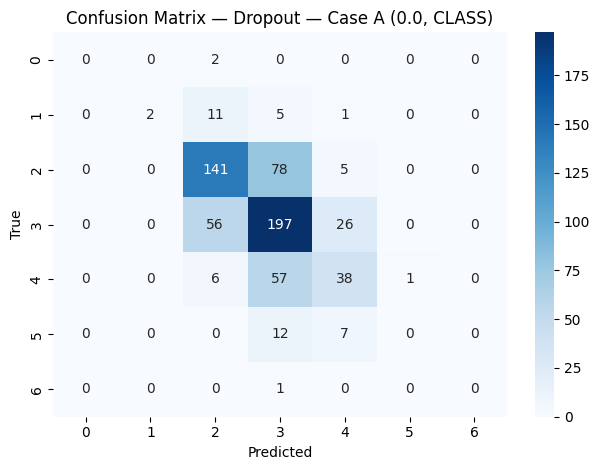

In [ ]:
mK_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=0.0, lr=BASE_LR)
mK_cls = fit("Dropout — Case A (0.0, CLASS)", mK_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Dropout — Case A (0.0, CLASS)", mK_cls, X_test_s, y_test)

### Case A — dropout 0.0 (Regression)

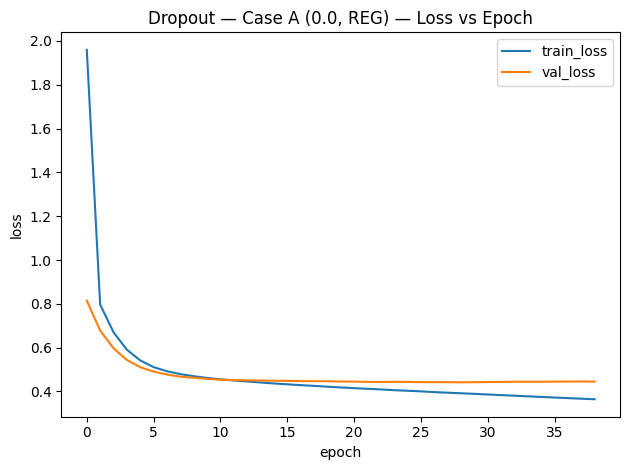

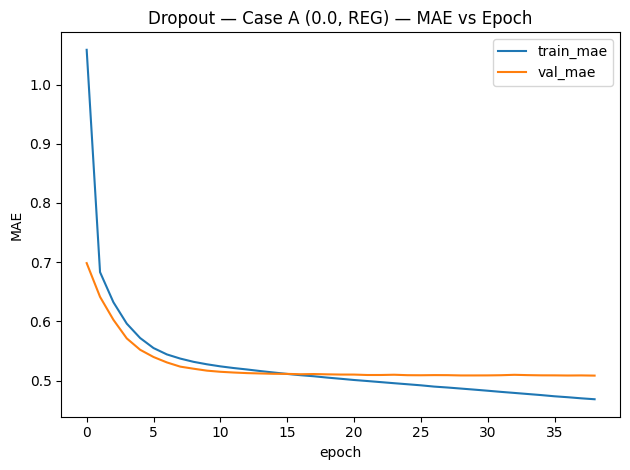


=== Dropout — Case A (0.0, REG) (Regression) ===
MAE:  0.5204
RMSE: 0.6853
R^2:  0.3689


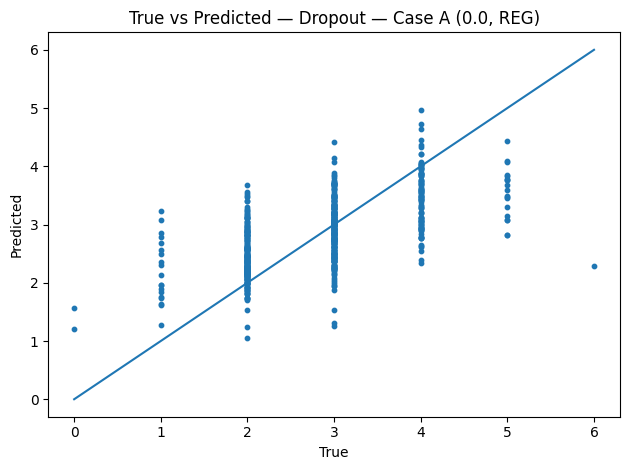

In [ ]:
mK_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=0.0, lr=BASE_LR)
mK_reg = fit("Dropout — Case A (0.0, REG)", mK_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Dropout — Case A (0.0, REG)", mK_reg, X_test_s, y_test)

### Case B — dropout 0.3 (Classification)

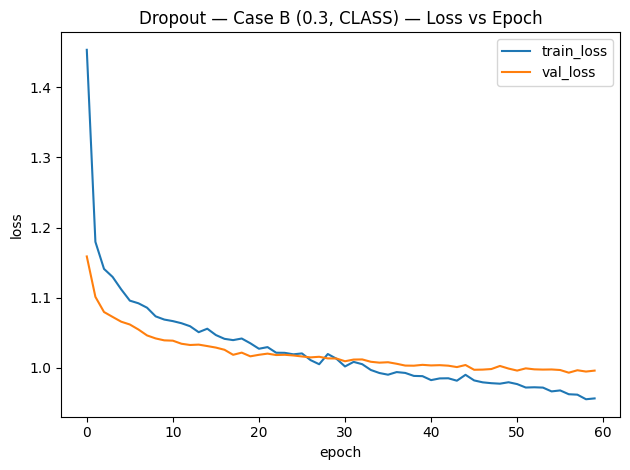

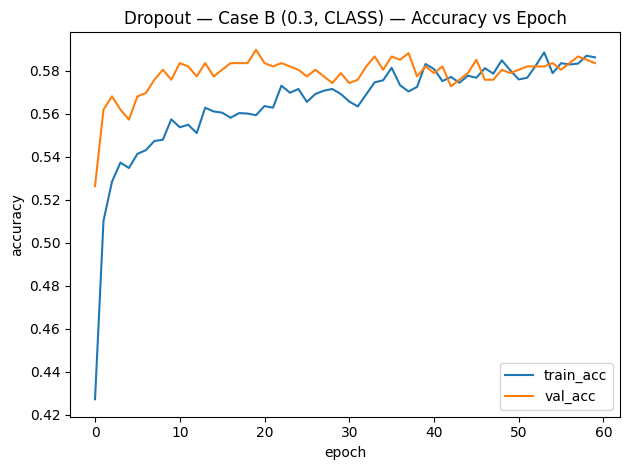


=== Dropout — Case B (0.3, CLASS) (Classification) ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.05      0.10        19
           2       0.64      0.64      0.64       224
           3       0.56      0.70      0.62       279
           4       0.55      0.38      0.45       102
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1

    accuracy                           0.59       646
   macro avg       0.46      0.32      0.33       646
weighted avg       0.58      0.59      0.57       646

accuracy: 0.586687306501548


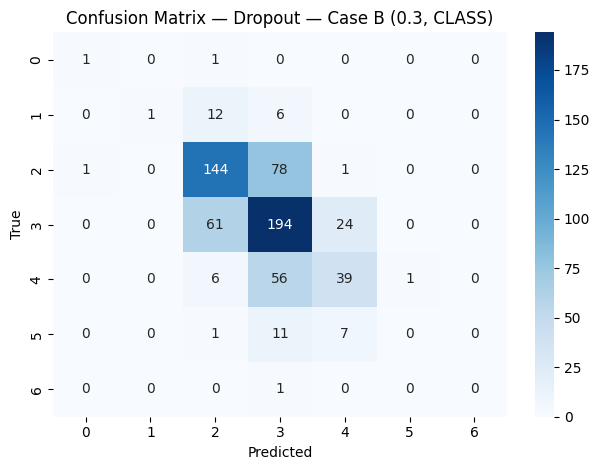

In [ ]:
mL_cls = build_ffnn_classifier(units=BASE_UNITS, dropout=0.3, lr=BASE_LR)
mL_cls = fit("Dropout — Case B (0.3, CLASS)", mL_cls, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_classification("Dropout — Case B (0.3, CLASS)", mL_cls, X_test_s, y_test)

### Case B — dropout 0.3 (Regression)

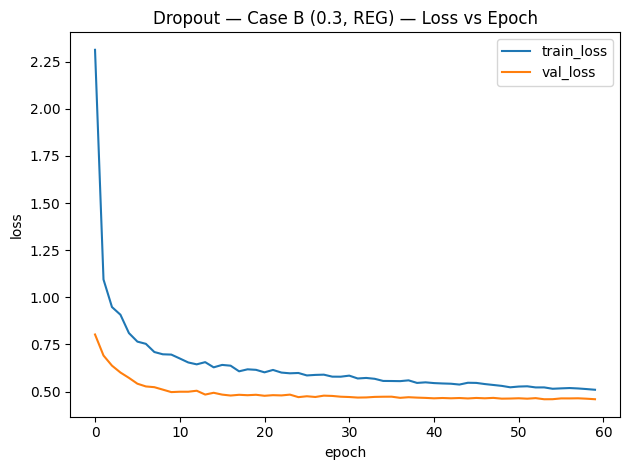

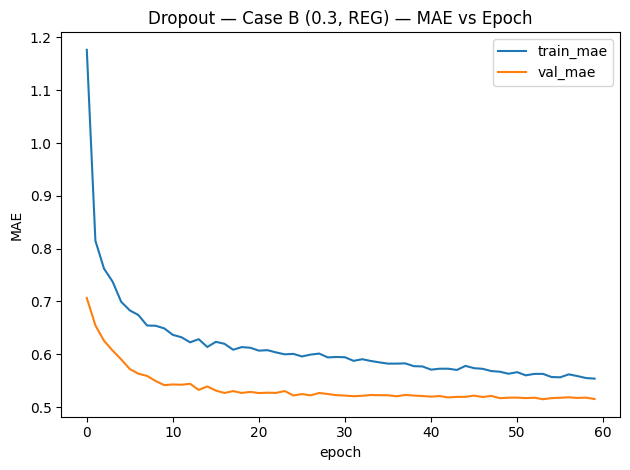


=== Dropout — Case B (0.3, REG) (Regression) ===
MAE:  0.5250
RMSE: 0.6840
R^2:  0.3715


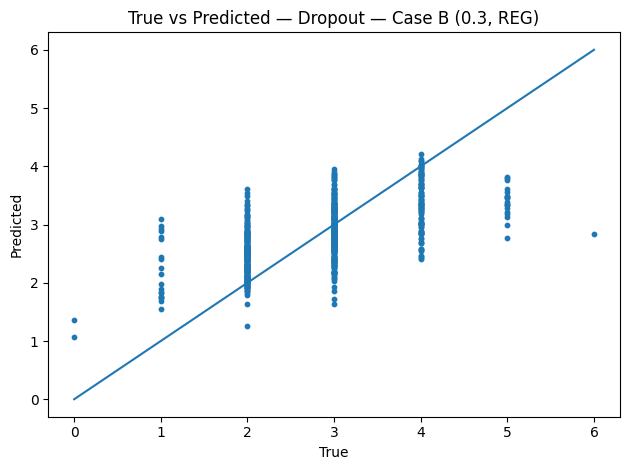

In [ ]:
mL_reg = build_ffnn_regressor(units=BASE_UNITS, dropout=0.3, lr=BASE_LR)
mL_reg = fit("Dropout — Case B (0.3, REG)", mL_reg, X_train_s, y_train, X_val_s, y_val,
             epochs=BASE_EPOCHS, batch=BASE_BATCH, patience=BASE_PATIENCE)
evaluate_regression("Dropout — Case B (0.3, REG)", mL_reg, X_test_s, y_test)

### Analysis

Model tanpa dropout (0.0) menghasilkan akurasi 0.57 dan R² 0.38, sedangkan dengan dropout 0.3 sedikit meningkat menjadi akurasi 0.58 namun R² menurun ke 0.37. Hal ini menunjukkan bahwa dropout membantu mencegah overfitting pada klasifikasi dengan membuat model lebih general, tetapi pada regresi dapat sedikit menurunkan kemampuan prediksi karena sebagian neuron di-nonaktifkan selama pelatihan. Pengaruh parameter dropout adalah memberikan keseimbangan antara kompleksitas dan generalisasi; tanpa dropout model bisa terlalu menyesuaikan data latih, sedangkan dropout berlebih bisa menghambat proses belajar.

# Kesimpulan

**Analisis model terbaik dan berikan alasan mengapa kinerja paling baik di antara model-model yang lain.**

Penambahan hidden layer lebih mampu menangkap pola kompleks, tetapi berisiko overfitting dan training lambat.

Penambahan layer berdampak peningkatan kapasitas representasi dan meningkatkan akurasi, tetapi berisiko overfitting dan waktu training lebih lama.

Penambahan epoch berdampak model belajar lebih lama dan akurasi meningkat sampai titik tertentu, tetapi berdampak overfitting setelah titik tersebut.

Penambahan batch size berdampak model lebih stabil, tetapi berisiko overfitting.

Learning rate meningkat lebih besar berdampak kepada stabilitas model. Di lain pihak, bila terlalu kecil, konvergensi sangat lambat.

Penambahan dropout layer akan mematikan sebagian neuron saat training. Akibatnya bisa mengurangi overfitting. Namun demikian, jika terlalu besar dropout, maka model sulit konvergen dan akurasi bisa turun.

Pada dataset ini, Model terbaik diperoleh pada konfigurasi dengan tiga hidden layer (256-128-64 unit), learning rate 1e-3, dan dropout ringan (0.1). Kombinasi ini memberikan akurasi tertinggi 0.60 untuk klasifikasi dan nilai R² 0.41 untuk regresi. Arsitektur yang lebih dalam dan jumlah unit yang lebih banyak membuat model mampu menangkap pola non-linear antarfitur secara lebih efektif, sementara learning rate yang sedikit lebih tinggi membantu percepatan konvergensi tanpa kehilangan stabilitas. Dropout ringan juga menjaga model agar tidak overfitting. Secara keseluruhan, model dengan kompleksitas menengah dan regularisasi seimbang terbukti memberikan performa paling optimal pada dataset wine quality.